# Lab | Unsupervised learning intro

### Instructions
It's the moment to perform clustering on the songs you collected. Remember that the ultimate goal of this little project is to improve the recommendations of artists. Clustering the songs will allow the recommendation system to limit the scope of the recommendations to only songs that belong to the same cluster - songs with similar audio features.

The experiments you did with the Spotify API and the Billboard web scraping will allow you to create a pipeline such that when the user enters a song, you:

* Check whether or not the song is in the Billboard Hot 200.
* Collect the audio features from the Spotify API.
* **After that, you want to send the Spotify audio features of the submitted song to the clustering model, which should return a cluster number.**

We want to have as many songs as possible to create the clustering model, so we will add the songs you collected to a bigger dataset available on Kaggle containing 160 thousand songs.

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [2]:
billboard=pd.read_excel("billboard_top_100.xlsx")
spotify=pd.read_excel("spotify.xlsx")

In [3]:
billboard=billboard.drop("Unnamed: 0",axis=1)
spotify=spotify.drop("Unnamed: 0",axis=1)

### Checking if song is in top 100

In [4]:
my_song=input()

Kill Bill


In [5]:
if my_song in billboard["Song"].values:
    song_index = billboard.loc[billboard["Song"] == my_song].index[0]
    artist_name = billboard.loc[song_index, "Artist"]
    print(f"{my_song} by {artist_name} is number {song_index+1} of the billboard top 100")
else:
    print(f"{my_song} was not found in the billboard dataframe.")

Kill Bill by SZA is number 2 of the billboard top 100


### Clustering Spotify Audio Feautures

In [6]:
le = LabelEncoder()
spotify["genre_encoded"] = le.fit_transform(spotify["genre"])
spotify

,artist_id,artist_name,song_name,song_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,tempo,valence,duration,genre,genre_encoded
0,06HL4z0CvFAxyc27GXpf02,Taylor Swift,Anti-Hero,0V3wPSX9ygBnCm8psDIegu,0.637,0.643,4,-6.571,1,0.0519,0.1300,0.000002,0.142,97.008,0.5330,200690,pop,9
1,06HL4z0CvFAxyc27GXpf02,Taylor Swift,Blank Space,1p80LdxRV74UKvL8gnD7ky,0.753,0.678,5,-5.421,1,0.0644,0.0850,0.000002,0.130,96.006,0.5830,231827,pop,9
2,06HL4z0CvFAxyc27GXpf02,Taylor Swift,Cruel Summer,1BxfuPKGuaTgP7aM0Bbdwr,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.105,169.994,0.5640,178427,pop,9
3,06HL4z0CvFAxyc27GXpf02,Taylor Swift,All Of The Girls You Loved Before,4P9Q0GojKVXpRTJCaL3kyy,0.718,0.467,2,-9.660,1,0.0398,0.7070,0.000069,0.126,95.960,0.3960,221407,pop,9
4,06HL4z0CvFAxyc27GXpf02,Taylor Swift,Lavender Haze,5jQI2r1RdgtuT8S3iG8zFC,0.733,0.436,10,-10.489,1,0.0800,0.2580,0.000573,0.157,96.985,0.0976,202396,pop,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6745,4TwHRCIu3Xg9fjS3l7owkp,The Gap Band,Burn Rubber On Me (Why You Wanna Hurt Me),32YzjV133gteg9LMBGO2OA,0.764,0.733,11,-10.763,0,0.0538,0.0986,0.001040,0.171,116.185,0.8870,252307,funk,5
6746,4TwHRCIu3Xg9fjS3l7owkp,The Gap Band,Early In The Morning,0sLqiSi6TdS9PNrGbGumw7,0.719,0.826,4,-9.525,0,0.0456,0.1170,0.012500,0.924,122.830,0.8250,390000,funk,5
6747,4TwHRCIu3Xg9fjS3l7owkp,The Gap Band,"Early In The Morning - 12"" Version",46llPK4QUykzRkMWxoAjcP,0.697,0.809,4,-10.358,0,0.0414,0.0405,0.009490,0.894,121.376,0.8210,456733,funk,5
6748,4TwHRCIu3Xg9fjS3l7owkp,The Gap Band,Party Train,2ULLfb35Xp05d8QbbKXlXw,0.734,0.770,4,-8.521,0,0.0498,0.0635,0.006240,0.214,127.521,0.8700,347253,funk,5


In [7]:
#Getting audio features (We will not consider duration)
audio_features = ["danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "tempo", "valence","genre_encoded"]
X = spotify[audio_features].values


In [8]:
for i in range(2,15):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)

    spotify["cluster"] = kmeans.labels_

    from sklearn.metrics import silhouette_score

    silhouette_avg = silhouette_score(X, kmeans.labels_)
    print("The average silhouette_score is :", silhouette_avg," for number of clusters:",i)


/Users/albertoalfaro/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The average silhouette_score is : 0.5134784310119127  for number of clusters: 2


/Users/albertoalfaro/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The average silhouette_score is : 0.47461891341199247  for number of clusters: 3


/Users/albertoalfaro/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The average silhouette_score is : 0.39031273612674167  for number of clusters: 4


/Users/albertoalfaro/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The average silhouette_score is : 0.37756671391976854  for number of clusters: 5


/Users/albertoalfaro/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The average silhouette_score is : 0.3270440432223873  for number of clusters: 6


/Users/albertoalfaro/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The average silhouette_score is : 0.31096839009458915  for number of clusters: 7


/Users/albertoalfaro/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The average silhouette_score is : 0.3118162865303701  for number of clusters: 8


/Users/albertoalfaro/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The average silhouette_score is : 0.3186930681565478  for number of clusters: 9


/Users/albertoalfaro/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The average silhouette_score is : 0.29827388895907386  for number of clusters: 10


/Users/albertoalfaro/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The average silhouette_score is : 0.3081114465930615  for number of clusters: 11


/Users/albertoalfaro/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The average silhouette_score is : 0.27277978684865417  for number of clusters: 12


/Users/albertoalfaro/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The average silhouette_score is : 0.27737480105861756  for number of clusters: 13


/Users/albertoalfaro/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The average silhouette_score is : 0.23952708890293084  for number of clusters: 14


In [9]:
print(spotify["cluster"].value_counts())
print(spotify.groupby("cluster")[audio_features].mean())


9     815
8     794
11    730
7     667
13    657
2     575
0     548
6     524
12    462
1     396
3     166
10    145
4     142
5     129
Name: cluster, dtype: int64
         danceability    energy       key   loudness      mode  speechiness  \
cluster                                                                       
0            0.639861  0.610885  5.664234  -7.777173  0.613139     0.099570   
1            0.509834  0.696743  5.636364  -7.421932  0.621212     0.100729   
2            0.601843  0.621982  5.116522  -7.554010  0.636522     0.079310   
3            0.311492  0.067753  5.066265 -26.333367  0.608434     0.048506   
4            0.405634  0.097236  4.401408 -24.634317  0.584507     0.047391   
5            0.424484  0.703356  5.325581  -7.262008  0.736434     0.105626   
6            0.551718  0.669484  5.379771  -7.144979  0.664122     0.084816   
7            0.545653  0.513112  5.160420  -8.886609  0.616192     0.083392   
8            0.646106  0.700752  5.945844 

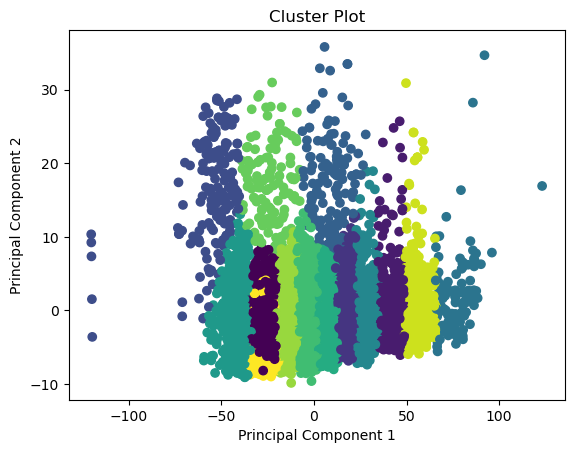

In [10]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform PCA to reduce dimensionality
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

# Plot the data points colored by their assigned cluster
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('Cluster Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
